<a href="https://colab.research.google.com/github/sdlm/pytorch_mnist/blob/master/generate_background.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import imgaug as ia
from imgaug import augmenters as iaa
import imageio
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [0]:
h_size = w_size = 256

In [0]:
rough_aug = iaa.Sequential([
    iaa.CoarseDropout((0, 0.2), size_percent=(0.01, 0.03), per_channel=1),
    iaa.GaussianBlur(sigma=(0, 20)),
    iaa.Multiply((0.5, 1.5), per_channel=0.3),
    iaa.ContrastNormalization((0.5, 1.5), per_channel=0.5),
    iaa.PiecewiseAffine(scale=(0.01, 0.1)),          
])

normal_aug = iaa.Sequential([
    iaa.CoarseDropout((0, 0.2), size_percent=(0.03, 0.05), per_channel=1),
    iaa.GaussianBlur(sigma=(0, 20)),
    iaa.Multiply((0.5, 1.5), per_channel=0.3),
    iaa.ContrastNormalization((0.5, 1.5), per_channel=0.5),
    iaa.PiecewiseAffine(scale=(0.01, 0.1)),          
])

thin_aug = iaa.Sequential([
    iaa.CoarseDropout((0, 0.2), size_percent=(0.05, 0.2), per_channel=1),
    iaa.PiecewiseAffine(scale=(0.01, 0.05)),
])


background_aug = iaa.Sequential([
    
  iaa.Sometimes(
      0.95, 
      iaa.OneOf([
          iaa.Sequential([rough_aug]),
          iaa.Sequential([rough_aug, normal_aug]),
          iaa.Sequential([rough_aug, normal_aug, thin_aug]),
      ]),
      iaa.Noop(),
  ),
  iaa.Multiply((0, 1.0), per_channel=0.9),

])

In [0]:
def get_background(h_size=256, w_size=256):
    original_smpl = np.empty((h_size, w_size, 3), dtype=np.uint8)
    original_smpl.fill(255)
    smpl = background_aug.augment_image(original_smpl)
    np.clip(smpl, 0, 255, out=smpl)
    return smpl

CPU times: user 132 ms, sys: 72.2 ms, total: 204 ms
Wall time: 116 ms


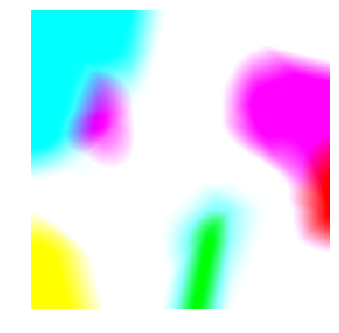

In [11]:
%%time
plt.axis('off')
plt.imshow(get_background());

CPU times: user 22.6 s, sys: 19.4 s, total: 42 s
Wall time: 21.7 s


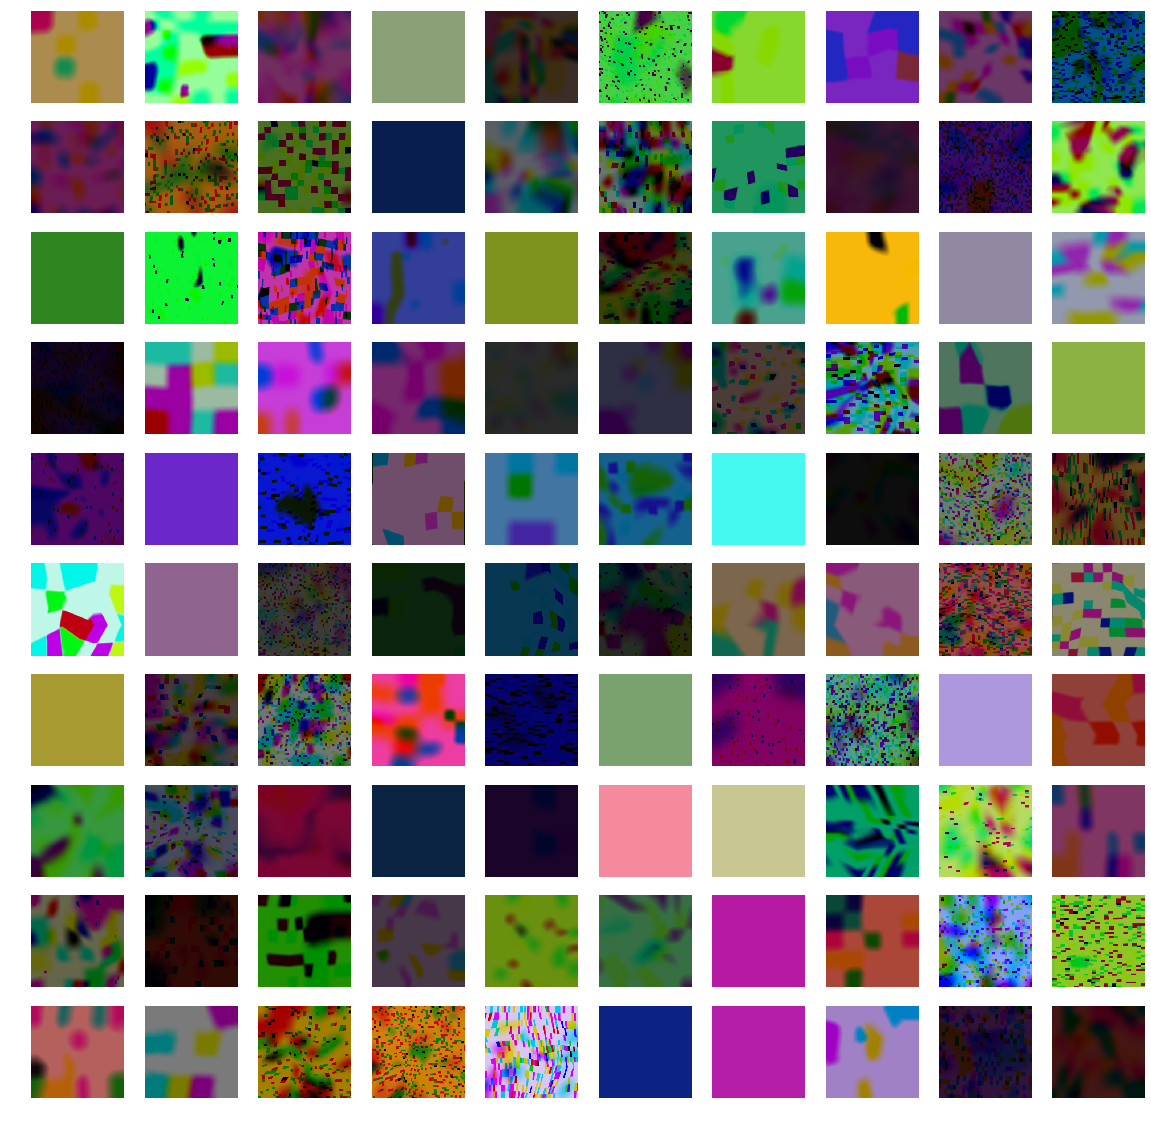

In [15]:
%%time
cols = 10
rows = 10
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
for i in range(cols):
    for j in range(rows):
        axes[j, i].set_axis_off()
        axes[j, i].imshow(get_background())